<a href="https://colab.research.google.com/github/KrituneX/Machine-Learning/blob/main/UAS/Task/ML_UAS_FishClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install gdown (jika belum)
!pip install -q gdown

# Download dataset dari Google Drive dan unzip
!gdown --fuzzy https://drive.google.com/file/d/1-r4LHN_PaRVBROogfXF3VXWTWIyUoSLs/view?usp=sharing
!unzip -q FishImgDataset-20250613T014653Z-1-001.zip -d /content/


Downloading...
From (original): https://drive.google.com/uc?id=1-r4LHN_PaRVBROogfXF3VXWTWIyUoSLs
From (redirected): https://drive.google.com/uc?id=1-r4LHN_PaRVBROogfXF3VXWTWIyUoSLs&confirm=t&uuid=9ec2fab6-b6c9-49ca-b612-129558d90e21
To: /content/FishImgDataset-20250613T014653Z-1-001.zip
100% 1.72G/1.72G [00:24<00:00, 69.8MB/s]


In [2]:
# Import library
import os, numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# A. Load dan Preprocessing Data
base_dir = "/content/FishImgDataset"
train_dir, val_dir, test_dir = [os.path.join(base_dir, x) for x in ["train", "val", "test"]]

# Augmentasi dan preprocessing gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')
val_gen   = val_test_datagen.flow_from_directory(val_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')
test_gen  = val_test_datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', shuffle=False)

Found 8801 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.


In [3]:
# B. CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         7,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,523,999 (24.89 MB)

 Trainable params: 6,523,999 (24.89 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# C. Training
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.1478 - loss: 3.2693 - val_accuracy: 0.2515 - val_loss: 2.7357
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.2523 - loss: 2.8169 - val_accuracy: 0.3359 - val_loss: 2.3116
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.2892 - loss: 2.5540 - val_accuracy: 0.3228 - val_loss: 2.4292
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.3379 - loss: 2.3536 - val_accuracy: 0.4228 - val_loss: 2.0110
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.3612 - loss: 2.2590 - val_accuracy: 0.4569 - val_loss: 1.8594
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.3728 - loss: 2.1640 - val_accuracy: 0.4944 - val_loss: 1.7162
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.4151 - loss: 2.0307 - val_accuracy: 0.5184 - val_loss: 1.6652
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.4368 - loss: 1.9625 - val_accu

55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 515ms/step


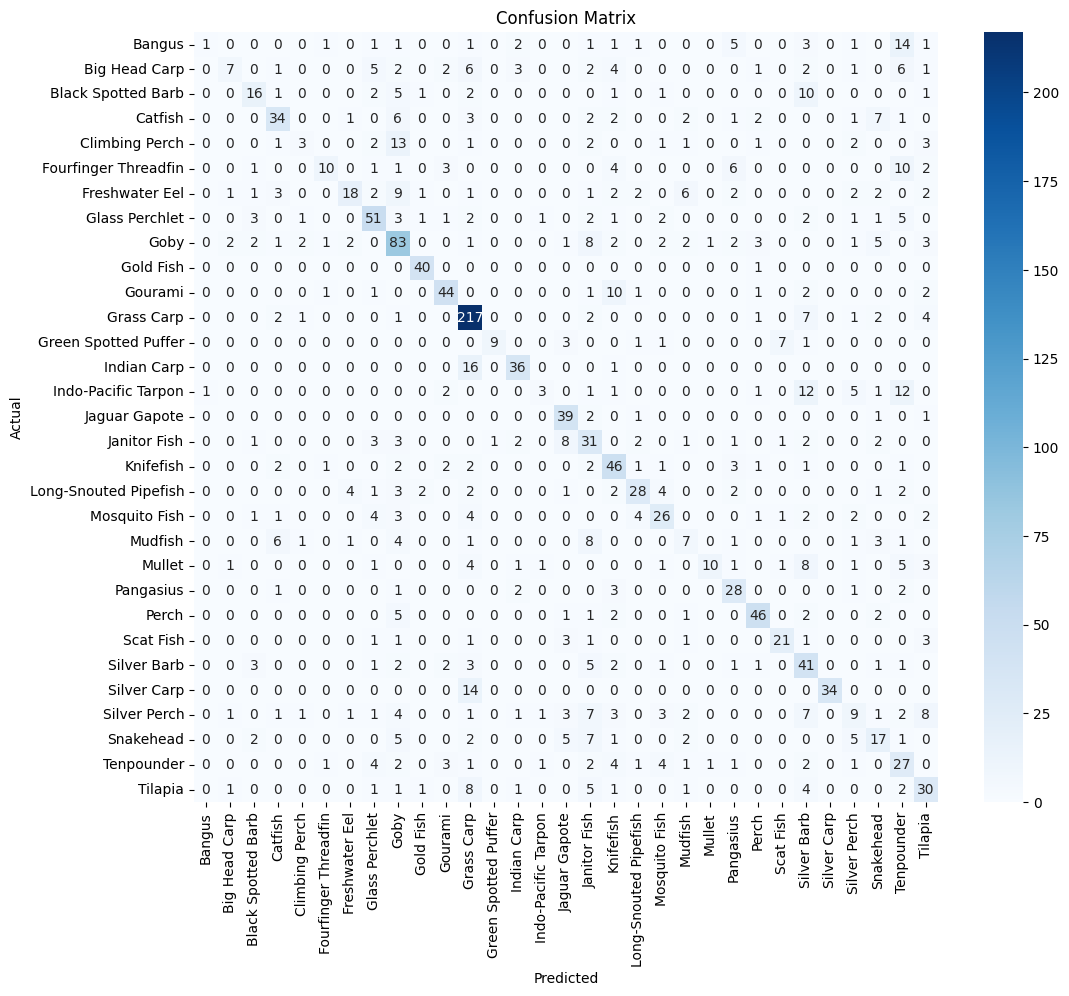

Classification Report:
                        precision    recall  f1-score   support

               Bangus       0.50      0.03      0.06        34
        Big Head Carp       0.54      0.16      0.25        43
   Black Spotted Barb       0.53      0.40      0.46        40
              Catfish       0.63      0.55      0.59        62
       Climbing Perch       0.33      0.10      0.15        30
 Fourfinger Threadfin       0.67      0.26      0.38        38
       Freshwater Eel       0.67      0.33      0.44        55
       Glass Perchlet       0.62      0.66      0.64        77
                 Goby       0.52      0.67      0.58       124
            Gold Fish       0.87      0.98      0.92        41
              Gourami       0.75      0.70      0.72        63
           Grass Carp       0.74      0.91      0.82       238
 Green Spotted Puffer       0.90      0.41      0.56        22
          Indian Carp       0.75      0.68      0.71        53
  Indo-Pacific Tarpon       0.

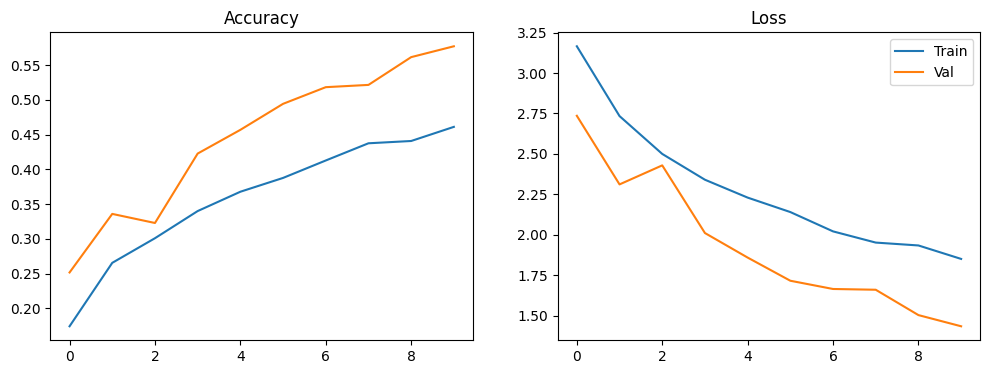

In [5]:
# Prediksi dan evaluasi
y_pred = model.predict(test_gen)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true = test_gen.classes
labels = list(test_gen.class_indices.keys())

# Confusion Matrix
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_cls), annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_cls, target_names=labels))

# ROC-AUC multiclass
try:
    y_true_bin = tf.keras.utils.to_categorical(y_true)
    print(f"AUC Score (OvR): {roc_auc_score(y_true_bin, y_pred, multi_class='ovr'):.4f}")
except:
    print("AUC multiclass tidak dapat dihitung.")

# Akurasi dan Loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train'); plt.plot(history.history['val_accuracy'], label='Val'); plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train'); plt.plot(history.history['val_loss'], label='Val'); plt.title("Loss")
plt.legend(); plt.show()

# **Analisis Matriks Evaluasi Model Klasifikasi**

Setelah model CNN dilatih dan diuji terhadap data test, kita mengevaluasinya menggunakan beberapa metrik klasifikasi:

- Accuracy

- Precision

- Recall

- F1-Score

- Confusion Matrix

- AUC-ROC (optional untuk multiclass)

# **Perbandingan Matriks Evaluasi**

### **Accuracy:**
Persentase prediksi yang benar dari semua prediksi. Baik jika distribusi kelas seimbang.

### **Precision:**
Proporsi prediksi positif yang benar-benar benar. Mengukur kesalahan tipe I.

### **Recall:**
Proporsi kelas aktual yang berhasil diprediksi dengan benar. Mengukur kesalahan tipe II.

### **F1-Score:**
Harmonic mean dari Precision dan Recall. Berguna jika kelas tidak seimbang.

### **Confusion Matrix:**
Matriks yang menunjukkan jumlah prediksi benar dan salah untuk tiap kelas.

### **AUC-ROC:**
Kemampuan model membedakan antar kelas. Umumnya untuk binary, bisa diperluas ke multiclass (One-vs-Rest).

# **Analisis dan Interpretasi**

Dari hasil klasifikasi jenis ikan:

- Confusion matrix membantu mengidentifikasi kelas-kelas yang sering tertukar (misalnya: Silver Barb vs Silver Perch).

- Jika banyak kelas (lebih dari 20), akurasi saja tidak cukup menggambarkan performa model secara adil.

- Precision dan Recall per kelas memberikan wawasan lebih detail untuk kelas-kelas yang sulit dibedakan.

- F1-Score sangat berguna ketika jumlah data tiap kelas tidak seimbang — seperti yang sering terjadi dalam klasifikasi gambar jenis ikan.

# **Matriks Terbaik**

F1-Score adalah metrik evaluasi terbaik untuk kasus klasifikasi multiklas jenis ikan, terutama karena:

- Terdapat jumlah kelas yang banyak dan kemungkinan tidak seimbang

- Kita butuh keseimbangan antara mendeteksi ikan secara benar (recall) dan tidak salah prediksi ke kelas lain (precision)

Contoh Interpretasi F1-Score
Jika pada kelas Gourami model memiliki:

Precision: 0.72

Recall: 0.80

F1-Score: 0.76

Maka ini menunjukkan bahwa model cukup baik mengenali gambar Gourami, dan hanya sedikit kesalahan klasifikasi.

# **Kesimpulan**
Gunakan F1-Score sebagai matriks utama evaluasi performa model CNN pada klasifikasi jenis ikan karena memberikan penilaian seimbang terhadap kesalahan prediksi antar kelas.